# Feature Extraction

### PCA & NMF

In [64]:
from sklearn.datasets import load_iris, load_boston, load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA, NMF
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score, silhouette_score
%matplotlib inline

In [8]:
data = load_iris()
X = data.data
y = data.target

sc = MinMaxScaler()
X = sc.fit_transform(data.data)

sds = StandardScaler()
X_s = sds.fit_transform(data.data)

In [3]:
pca = PCA(n_components=2)
X1 = pca.fit_transform(X)
X1s = pca.fit_transform(X_s)

nmf = NMF(n_components = 2, random_state = 0)
X2 = nmf.fit_transform(X)

df1 = pd.concat([pd.DataFrame(X1,columns = ['x1','x2']),pd.DataFrame(y,columns = ['y']),pd.DataFrame(X1s,columns = ['x3','x4'])],axis = 1)
df1.replace({'y':dict(zip(np.unique(data.target), data.target_names))},inplace= True)
df2 = pd.concat([pd.DataFrame(X2,columns = ['x1','x2']),pd.DataFrame(y,columns = ['y'])],axis = 1)
df2.replace({'y':dict(zip(np.unique(data.target), data.target_names))},inplace= True)

In [4]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [5]:
nmf.components_

array([[1.45929174, 0.20907474, 2.01781889, 2.04242101],
       [0.6413154 , 2.31959176, 0.05582625, 0.        ]])

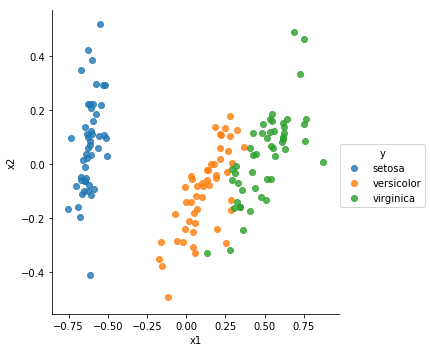

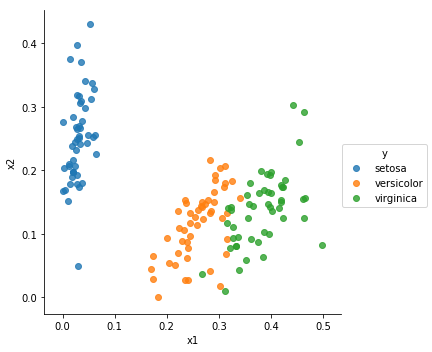

In [6]:
sns.lmplot('x1','x2',data = df1,hue = 'y',fit_reg= False)
#ns.lmplot('x3','x4',data = df1,hue = 'y',fit_reg= False)
sns.lmplot('x1','x2',data = df2,hue = 'y',fit_reg= False)

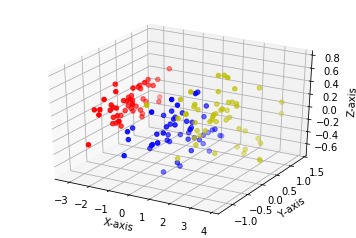

In [25]:
from sklearn.datasets import load_iris
X_3d = PCA(n_components=3).fit_transform(load_iris().data)
df = pd.DataFrame(X_3d, columns = ['x1','x2','x3'])
df['y'] = data.target

df.replace({'y':dict(zip(np.unique(data.target), data.target_names))},inplace= True)
fig = plt.figure()
from mpl_toolkits import mplot3d
ax = fig.add_subplot(111, projection='3d')

 # Generate the values
x_vals = df.iloc[:, 0:1]
y_vals = df.iloc[:, 1:2]
z_vals = df.iloc[:, 2:3]

 # Plot the values
for a,b in zip(np.unique(data.target_names),['r','b','y']):
    ax.scatter(x_vals[df['y']==a], y_vals[df['y']==a], z_vals[df['y']==a], c = b, marker='o')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

### Manifold

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42)
data_tsne = tsne.fit_transform(data.data)
data_tsne.shape

(150, 2)

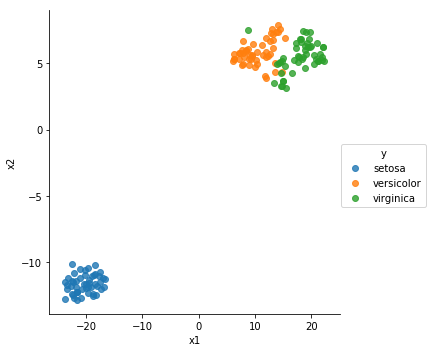

In [11]:
df = pd.concat([pd.DataFrame(data_tsne,columns = ['x1','x2']),pd.DataFrame(y,columns = ['y'])],axis = 1)
df.replace({'y':dict(zip(np.unique(data.target), data.target_names))},inplace= True)
sns.lmplot('x1','x2',data = df,hue = 'y',fit_reg= False)

# Clustering

### K-Means (vector quantization)

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)

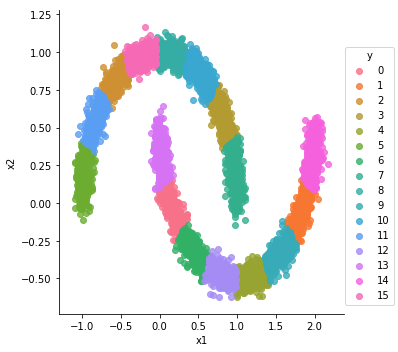

In [83]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 5000, noise = .05, random_state = 20)
#plt.scatter(X[:,0], X[:,1])
kmeans = KMeans(n_clusters=16).fit(X)
y_pred = kmeans.predict(X)
df = pd.DataFrame(X,columns = ['x1','x2'])
df['y'] = pd.Series(y_pred)
sns.lmplot('x1','x2',data = df, hue = 'y', fit_reg= False)

### Agglomerative Clustering

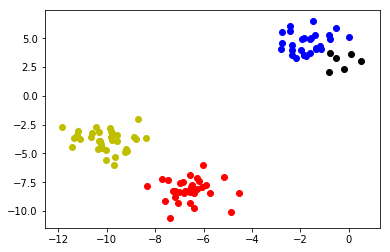

In [26]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state = 1)
agg = AgglomerativeClustering(n_clusters = 4)
assignment = agg.fit_predict(X)
plt.scatter(X[assignment == 0][:,0],X[assignment == 0][:,1],c = 'r')
plt.scatter(X[assignment == 1][:,0],X[assignment == 1][:,1],c = 'b')
plt.scatter(X[assignment == 2][:,0],X[assignment == 2][:,1],c = 'y')
plt.scatter(X[assignment == 3][:,0],X[assignment == 3][:,1],c = 'black')

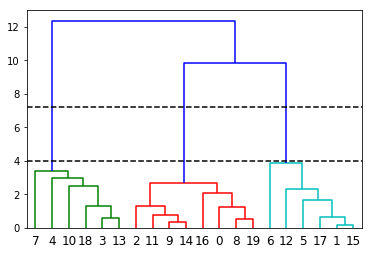

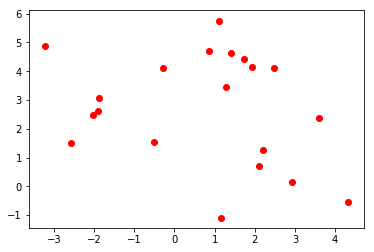

In [27]:
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=20)
linkage_array = ward(X)
dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25,7.25], '--', c = 'k')
ax.plot(bounds, [4,4], '--', c = 'k')
plt.figure()
plt.scatter(X[:,0],X[:,1],c = 'r')

### DBSCAN

1.0


0.382386022679393

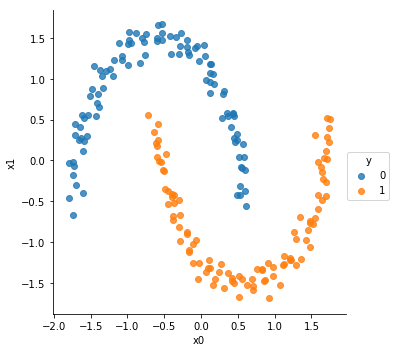

In [65]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(min_samples=2)

from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

clusters = dbscan.fit_predict(X_scaled)
df = pd.DataFrame(X_scaled, columns = ['x0','x1'])
df['y']= clusters
sns.lmplot('x0','x1',data=df, hue= 'y',fit_reg=False)

print(adjusted_rand_score(y, clusters))
silhouette_score(X_scaled, clusters)

# Faces with DBSCAN

In [87]:
pca = PCA(n_components= 100, whiten=True, random_state= 0)

from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)

mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people/255

X_pca = pca.fit_transform(X_people)

dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print('unique labels: {}'.format(np.unique(labels)))

unique labels: [-1]


In [71]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print('unique labels: {}'.format(np.unique(labels)))

unique labels: [-1]


In [75]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print('unique labels: {}'.format(np.unique(labels)))
np.bincount(labels+1)

unique labels: [-1  0]


array([  32, 2031], dtype=int64)

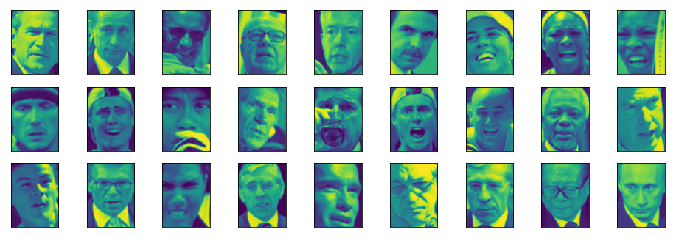

In [80]:
noise = X_people[labels==-1]
fig, axes = plt.subplots(3,9,subplot_kw = {'xticks':(), 'yticks':()}, figsize = (12,4))
image_shape = people.images[0].shape
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin = 0, vmax = 1)

In [81]:
for eps in [1,3,5,7,9,11,13]:
    print('\neps = {}'.format(eps))
    dbscan = DBSCAN(eps = eps, min_samples= 3)
    labels = dbscan.fit_predict(X_pca)
    print('Cluster present: {}'.format(np.unique(labels)))
    print('Cluster sizes: {}'.format(np.bincount(labels +1)))


eps = 1
Cluster present: [-1]
Cluster sizes: [2063]

eps = 3
Cluster present: [-1]
Cluster sizes: [2063]

eps = 5
Cluster present: [-1]
Cluster sizes: [2063]

eps = 7
Cluster present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
Cluster sizes: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps = 9
Cluster present: [-1  0  1  2]
Cluster sizes: [1307  750    3    3]

eps = 11
Cluster present: [-1  0]
Cluster sizes: [ 413 1650]

eps = 13
Cluster present: [-1  0]
Cluster sizes: [ 120 1943]


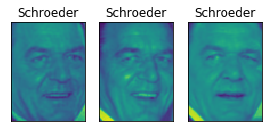

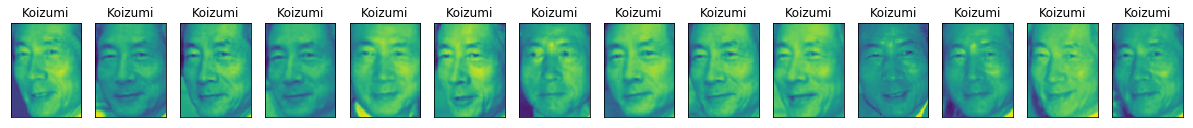

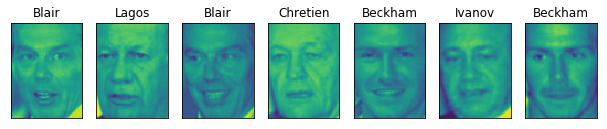

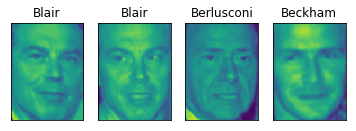

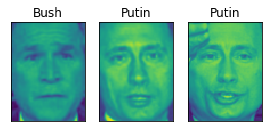

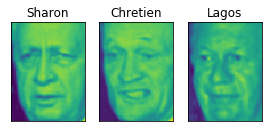

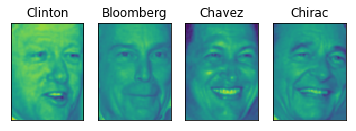

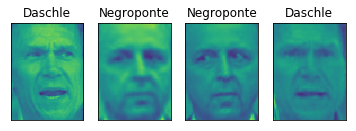

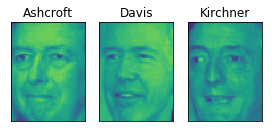

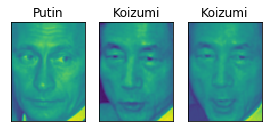

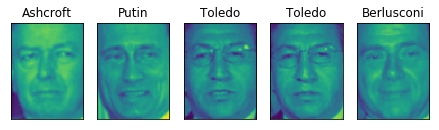

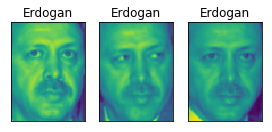

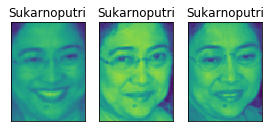

In [89]:
dbscan = DBSCAN(min_samples=3, eps = 7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels)+1):
    mask = labels==cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1,n_images, figsize = (n_images * 1.5,4), subplot_kw = {'xticks':(), 'yticks':()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin = 0, vmax = 1)
        ax.set_title(people.target_names[label].split()[-1])